# GRAPE for CNOT

In [1]:
# ruff: noqa
import os

os.sys.path.append("../../../..")

In [2]:
# ruff: noqa

"""
Gradient Ascent Pulse Engineering (GRAPE)
"""

import jax.numpy as jnp
import sys

from feedback_grape.grape import optimize_pulse, plot_control_amplitudes
from feedback_grape.utils.gates import cnot
from feedback_grape.utils.operators import identity, sigmax, sigmay, sigmaz
from feedback_grape.utils.tensor import tensor

# Example usage
g = 0  # Small coupling strength
H_drift = g * (tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))
H_ctrl = [
    tensor(sigmax(), identity(2)),
    tensor(sigmay(), identity(2)),
    tensor(sigmaz(), identity(2)),
    tensor(identity(2), sigmax()),
    tensor(identity(2), sigmay()),
    tensor(identity(2), sigmaz()),
    tensor(sigmax(), sigmax()),
    tensor(sigmay(), sigmay()),
    tensor(sigmaz(), sigmaz()),
]

U_0 = identity(4)
# Target operator (CNOT gate)
C_target = cnot()

num_t_slots = 500
total_evo_time = 2 * jnp.pi

# Run optimization
result = optimize_pulse(
    H_drift,
    H_ctrl,
    U_0,
    C_target,
    num_t_slots,
    total_evo_time,
    evo_type="unitary",
    max_iter=100,
    learning_rate=1e-2,
    optimizer="l-bfgs",
)
print("final_fidelity: ", result.final_fidelity)
print("U_f \n", result.final_operator)
print("Converged after: ", result.iterations)

final_fidelity:  0.9999999999922204
U_f 
 [[ 7.07106933e-01+7.07106629e-01j  1.10039032e-06+1.15585054e-07j
   7.92655810e-07-5.89990472e-07j -1.19644027e-06-1.31923794e-06j]
 [-1.15584542e-07-1.10039404e-06j  7.07105992e-01+7.07107570e-01j
   2.77384562e-06-1.88829997e-07j  8.29705551e-08-5.15626701e-07j]
 [ 1.31923876e-06+1.19644010e-06j  5.15631797e-07-8.29701399e-08j
  -6.59196752e-07+8.77991965e-07j  7.07106846e-01+7.07106717e-01j]
 [ 5.89986060e-07-7.92652913e-07j  1.88830810e-07-2.77384608e-06j
   7.07107354e-01+7.07106208e-01j -8.77993721e-07+6.59199671e-07j]]
Converged after:  83


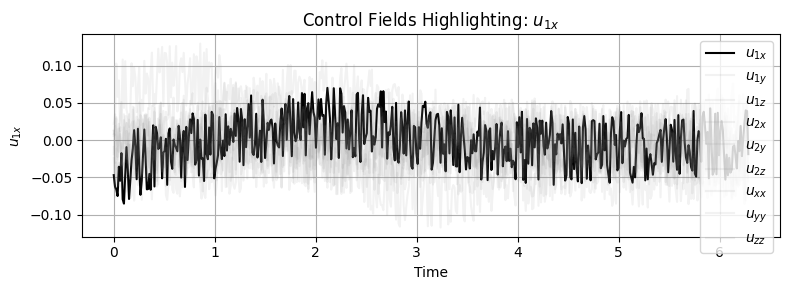

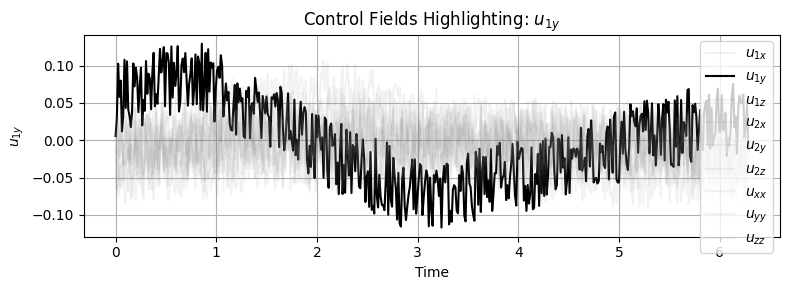

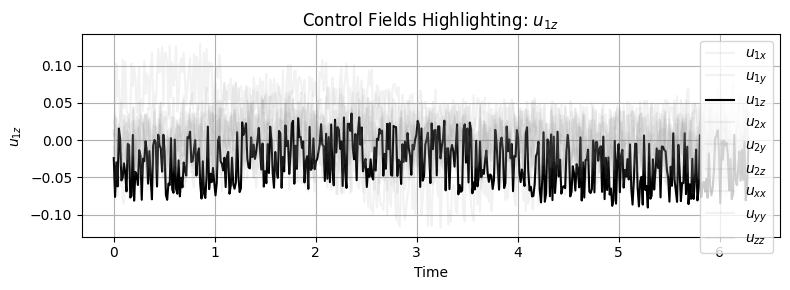

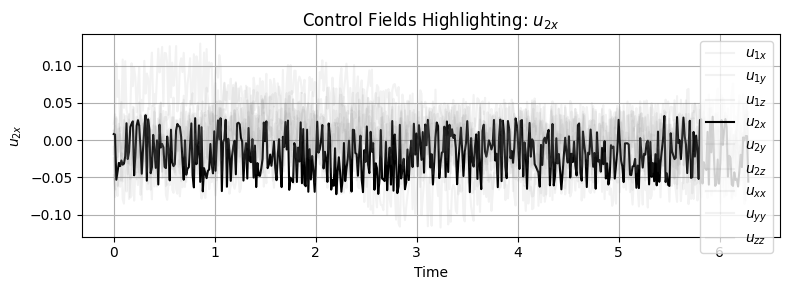

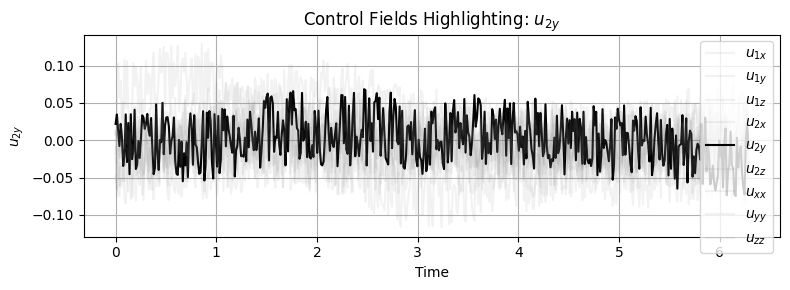

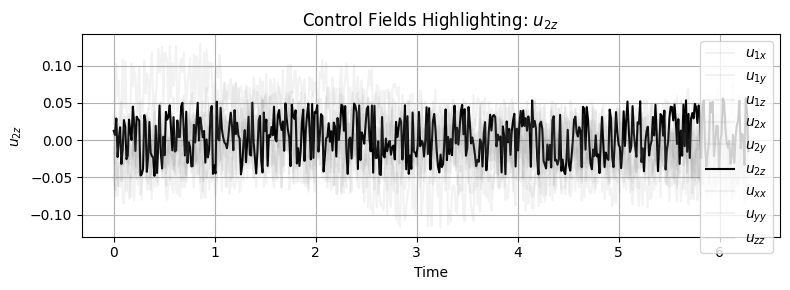

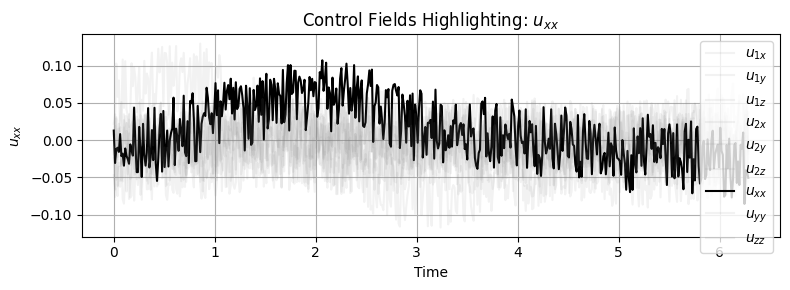

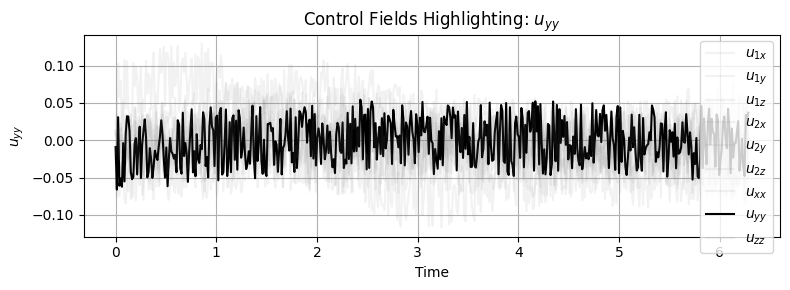

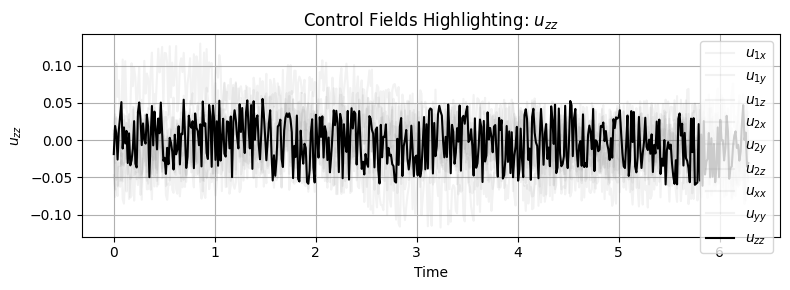

In [3]:
times = jnp.linspace(0, 2 * jnp.pi, 500)
H_labels = [
    r'$u_{1x}$',
    r'$u_{1y}$',
    r'$u_{1z}$',
    r'$u_{2x}$',
    r'$u_{2y}$',
    r'$u_{2z}$',
    r'$u_{xx}$',
    r'$u_{yy}$',
    r'$u_{zz}$',
]
plot_control_amplitudes(
    times, result.control_amplitudes / (2 * jnp.pi), H_labels
)

In [4]:
U_target = cnot()
U_f = result.final_operator

In [5]:
def overlap(U_target, U_f):
    """
    Calculate the overlap between the target unitary U_target and the final unitary U_f.

    Parameters:
    U_target (qutip.Qobj): Target unitary operator.
    U_f (qutip.Qobj): Final unitary operator.

    Returns:
    float: Real part of the overlap value.
    float: Fidelity (absolute square of the overlap).
    """
    # dividing over U_target.shape[0] is for normalization
    overlap_value = (
        jnp.trace(jnp.matmul(U_target.conj().T, U_f)) / U_target.shape[0]
    )
    fidelity = abs(overlap_value) ** 2
    return overlap_value.real, fidelity


# Example usage
overlap_real, fidelity = overlap(U_target, U_f)
print(f"Overlap (real part): {overlap_real}")
print(f"Fidelity: {fidelity}")

Overlap (real part): 0.707106781183797
Fidelity: 0.9999999999922191
